## Instalação,Importação das bibliotecas e dos dados.

In [5]:
!pip install missingno

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# sns.set()

In [7]:
#https://brasil.io/dataset/covid19/caso_full/
pd.options.display.float_format='{:.2f}'.format
covid19 = pd.read_csv('caso_full.csv.gz', compression = 'gzip')
covid19.shape
covid19

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.00,2020-02-25,9,12325232.00,12252023.00,False,False,1,0.01,2020-02-25,0.00,0,1,city,SP,1,0
1,NaN,35.00,2020-02-25,9,46289333.00,45919049.00,False,False,1,0.00,2020-02-25,0.00,0,1,state,SP,1,0
2,São Paulo,3550308.00,2020-02-26,9,12325232.00,12252023.00,False,False,1,0.01,2020-02-26,0.00,0,2,city,SP,0,0
3,NaN,35.00,2020-02-26,9,46289333.00,45919049.00,False,False,1,0.00,2020-02-26,0.00,0,2,state,SP,0,0
4,São Paulo,3550308.00,2020-02-27,9,12325232.00,12252023.00,False,False,1,0.01,2020-02-27,0.00,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016010,NaN,43.00,2020-11-07,45,11422973.00,11377239.00,True,False,260188,2277.76,2020-11-07,0.02,5990,243,state,RS,2403,17
1016011,NaN,42.00,2020-11-07,45,7252502.00,7164788.00,True,False,273652,3773.21,2020-11-07,0.01,3202,241,state,SC,5008,29
1016012,NaN,28.00,2020-11-07,45,2318822.00,2298696.00,True,False,85226,3675.40,2020-11-07,0.03,2239,239,state,SE,173,4
1016013,NaN,35.00,2020-11-07,45,46289333.00,45919049.00,False,True,1125936,2432.39,2020-11-05,0.04,39717,257,state,SP,0,0


## Investigação dos dados.

Como se trata de uma base de dados relativamente extensa, é importante verificar a qualidade dos dados para futuras análises e integração com outras bases de dados.

Para isto, inicialmente, será utilizado a lib missingno para verificar os *missings* na base de dados.



<Figure size 720x720 with 0 Axes>

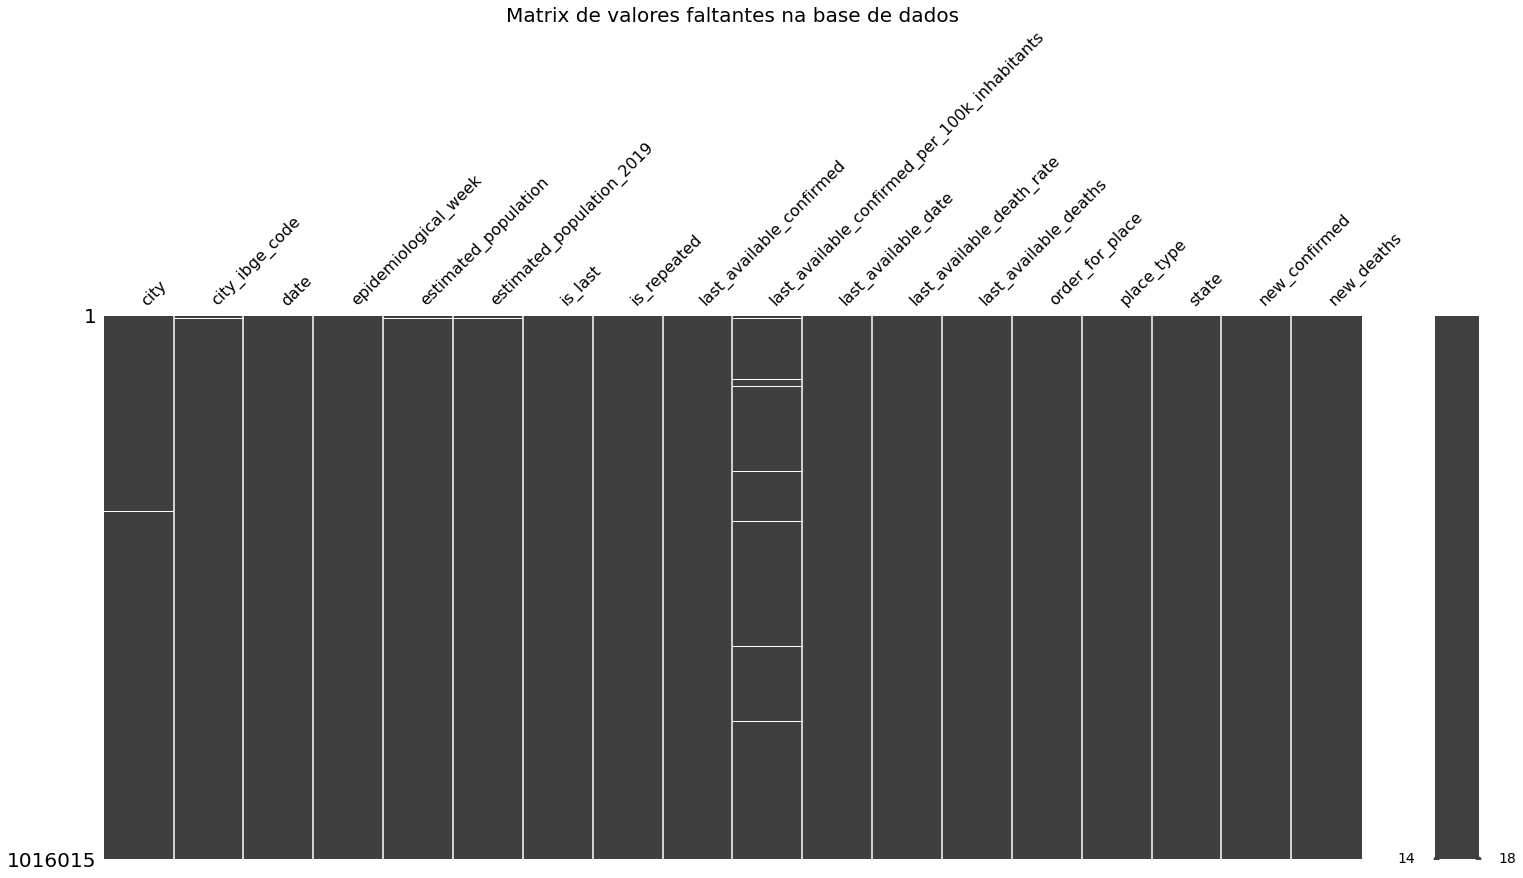

In [8]:
plt.figure(figsize=(10,10))
msno.matrix(covid19)
plt.title('Matrix de valores faltantes na base de dados',fontsize=20)
plt.show()

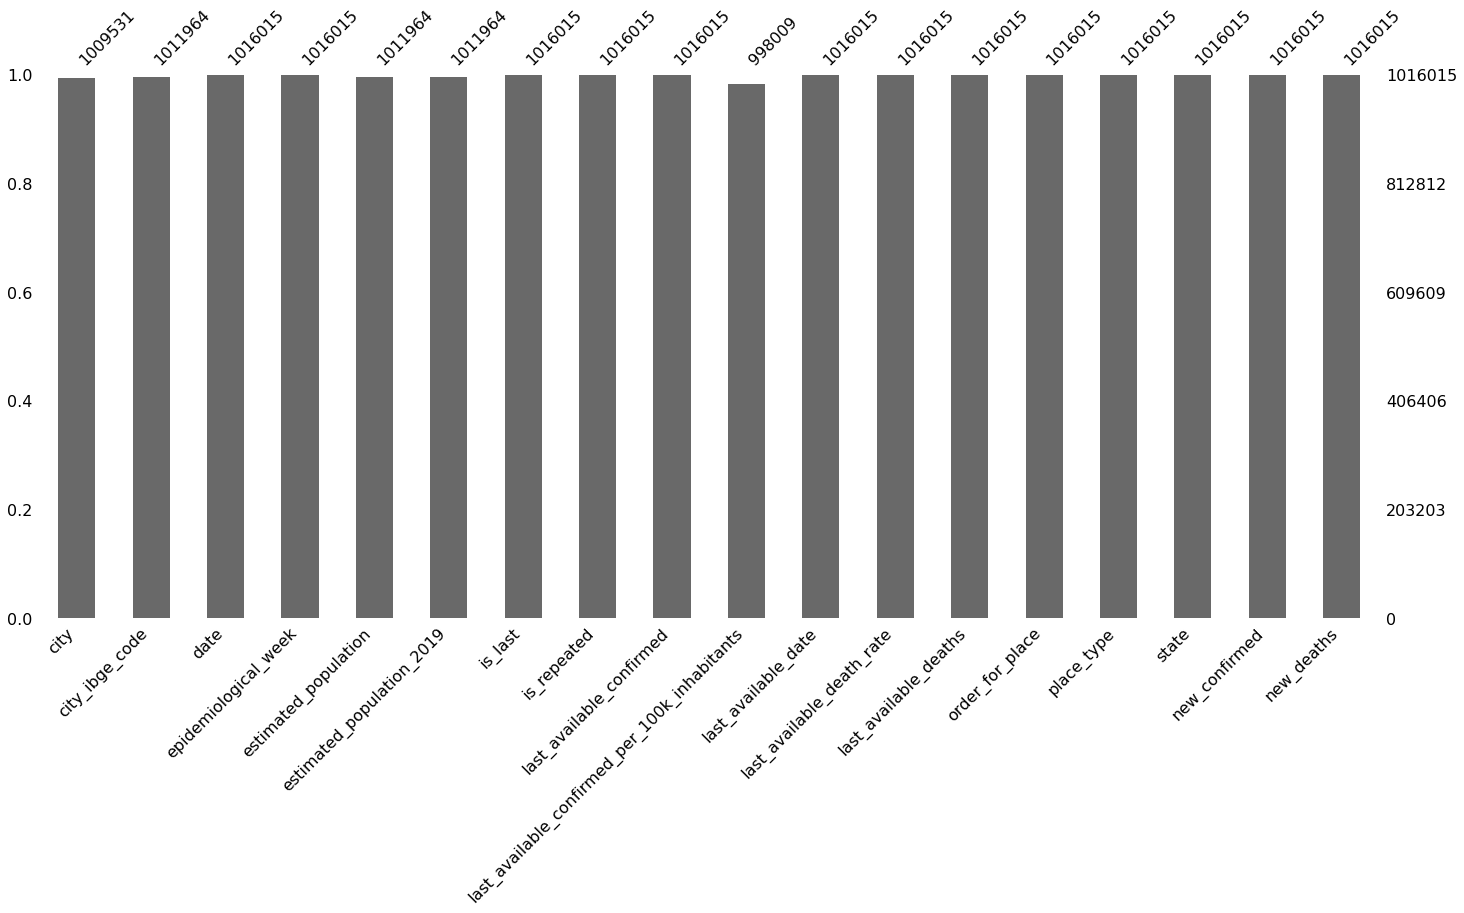

In [9]:
msno.bar(covid19)


In [10]:
#Verificação da quantidade de linhas faltantes no dataframe:
covid19.isnull().sum()

city                                              6484
city_ibge_code                                    4051
date                                                 0
epidemiological_week                                 0
estimated_population                              4051
estimated_population_2019                         4051
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    18006
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

In [11]:
#Verificação dos valores faltantes na base de dados.
#pd.options.display.float_format='{:.0f}'.format
pd.options.display.float_format='{:.2f} %'.format
covid19.isnull().sum()/covid19.shape[0]*100


city                                            0.64 %
city_ibge_code                                  0.40 %
date                                            0.00 %
epidemiological_week                            0.00 %
estimated_population                            0.40 %
estimated_population_2019                       0.40 %
is_last                                         0.00 %
is_repeated                                     0.00 %
last_available_confirmed                        0.00 %
last_available_confirmed_per_100k_inhabitants   1.77 %
last_available_date                             0.00 %
last_available_death_rate                       0.00 %
last_available_deaths                           0.00 %
order_for_place                                 0.00 %
place_type                                      0.00 %
state                                           0.00 %
new_confirmed                                   0.00 %
new_deaths                                      0.00 %
dtype: flo

## *city_ibge_code*, *Estimated_Population*,*Estimated_population_2019* têm a mesma quantidade de missing values!

> Desta forma, uma analise interessante de ser feita, justamente para validar se as linhas que contêm *missings* na coluna *city* necessáriamente têm *missing* nas colunas supracitadas:





In [12]:
verifyMissingRows = covid19.query('city_ibge_code != city_ibge_code')
# verifyMissingRows
verifyMissingRows.isnull().sum()

city                                                0
city_ibge_code                                   4051
date                                                0
epidemiological_week                                0
estimated_population                             4051
estimated_population_2019                        4051
is_last                                             0
is_repeated                                         0
last_available_confirmed                            0
last_available_confirmed_per_100k_inhabitants    4051
last_available_date                                 0
last_available_death_rate                           0
last_available_deaths                               0
order_for_place                                     0
place_type                                          0
state                                               0
new_confirmed                                       0
new_deaths                                          0
dtype: int64

# VOILÀ!

> A tabela acima demonstra que todos os *missing values* da tabela que apresentam *missings* na tabela  **city_ibge_code**
> Outro aspecto interessante é: todos os missings da variável **city** **não pertencem** ao conjunto de missings da variável **city_ibge_code**





#Analisando a variavel **city**

In [13]:
verifyCityMissingRows = covid19.query('city != city')
verifyCityMissingRows.isnull().sum()

city                                             6484
city_ibge_code                                      0
date                                                0
epidemiological_week                                0
estimated_population                                0
estimated_population_2019                           0
is_last                                             0
is_repeated                                         0
last_available_confirmed                            0
last_available_confirmed_per_100k_inhabitants       6
last_available_date                                 0
last_available_death_rate                           0
last_available_deaths                               0
order_for_place                                     0
place_type                                          0
state                                               0
new_confirmed                                       0
new_deaths                                          0
dtype: int64

## Valores encontrados 
>De acordo com o dicionário de dados disponível no portal Brasil IO, quando não existe preenchimento para cidade, mas a contagem é para o estado, os valores são preenchidos com NaN, mas tambem pode ser preenchido como "Importados/Indefinidos"



In [14]:
verifyCityMissingRows = covid19.query('city != city or city == "Importados/Indefinidos"')
verifyCityMissingRows.isnull().sum()


city                                             6484
city_ibge_code                                   4051
date                                                0
epidemiological_week                                0
estimated_population                             4051
estimated_population_2019                        4051
is_last                                             0
is_repeated                                         0
last_available_confirmed                            0
last_available_confirmed_per_100k_inhabitants    4057
last_available_date                                 0
last_available_death_rate                           0
last_available_deaths                               0
order_for_place                                     0
place_type                                          0
state                                               0
new_confirmed                                       0
new_deaths                                          0
dtype: int64

#
>> A partir da tabela acima, é possível concluir que:


>>*   Os missings da variável **city** não estão relacionados com outra coluna
>>*   Quando há o valor **Importados/Indefinidos** preenchido, significa que as colunas **[city_ibge_code,estimated_population,  estimated_population_2019]** apresentam *missings*

>> Apesar destes dados estarem faltando, isto não necessariamente implica que são inútel. Como foi possível perceber na tabela acima, o número de Casos e de Mortes *[new_confirmed,new_deaths]* não apresentam *missings*


>> Portanto, mais uma análise é necessária: **A contagem de casos e de mortes é preenchida com zero ou algum númeor padrão dada as condições dos campos citados?**




In [34]:
teste = verifyCityMissingRows.groupby(['state','city'])[['new_deaths','new_confirmed']].sum()
sp = teste.loc['MG','new_deaths']
teste

,,new_deaths,new_confirmed
state,city,,
AL,Importados/Indefinidos,8,8
BA,Importados/Indefinidos,54,7296
CE,Importados/Indefinidos,0,3437
DF,Importados/Indefinidos,301,26573
ES,Importados/Indefinidos,24,1166
GO,Importados/Indefinidos,0,0
MG,Importados/Indefinidos,78,2415
MT,Importados/Indefinidos,37,284
PA,Importados/Indefinidos,0,0


In [33]:
verifyCityMissingRows2 = covid19.query('city != city')
teste2 = verifyCityMissingRows2.groupby(['state','city'])[['new_deaths','new_confirmed']].sum()
sp2 = teste2.loc['MG','new_deaths']
teste2

,new_deaths,new_confirmed
state,,
AC,699,31575
AL,2266,91603
AM,4622,165394
AP,751,52832
BA,7776,362563
CE,9395,278053
DF,3740,215850
ES,3919,161208
GO,5874,261347


In [38]:
print('Os valores para mortes em valores  %f \nOs valores para a variável city com NaN %f' % (sp,sp2))

Os valores para mortes em valores  78.000000 
Os valores para a variável city com NaN 9204.000000


## Desta forma

>>Se pode perceber que é relevante o número de mortes mesmo para os dados com valores faltantes para o nome da cidade.

## Estimando o impacto dos missings:

>> Para estimar basta retirar os *missings* e ferificar a variação percentual com relação a base toda.



In [64]:
Normal = covid19.groupby('state')['new_deaths','new_confirmed'].sum()
droppedMissings =  covid19.dropna().groupby('state')['new_deaths','new_confirmed'].sum()
pd.options.display.float_format='{:.2f} %'.format
print('A perda estimada da quantidade de dados da base, caso os dados sejam dropados é %f ' 
      % ((1-(covid19.dropna().shape[0]/covid19.shape[0]))*100))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


A perda estimada da quantidade de dados da base, caso os dados sejam dropados é 2.409807 


In [47]:
pd.options.display.float_format='{:.2f} %'.format
(1-droppedMissings/Normal)*100


,new_deaths,new_confirmed
state,,
AC,50.07 %,50.20 %
AL,50.18 %,50.00 %
AM,50.31 %,50.50 %
AP,50.07 %,50.08 %
BA,50.50 %,51.24 %
CE,50.02 %,50.69 %
DF,54.02 %,56.16 %
ES,53.20 %,56.00 %
GO,49.97 %,49.99 %


## 2,4% de linhas faltantes afetam a contagem de mortes e casos em torno de 50%!

## Análise last_available_confirmed_per_100k_habitants

>> Esta é a coluna que mais apresenta missigns. Sua definição na base no *metadados* no portal brasil.io é:

>>>>"Número de casos confirmados por 100.000 habitantes do último dia disponível igual ou anterior à data date."






In [18]:
oneHundK = covid19.query('last_available_confirmed_per_100k_inhabitants != last_available_confirmed_per_100k_inhabitants')
oneHundK.isnull().sum()

city                                                 6
city_ibge_code                                    4051
date                                                 0
epidemiological_week                                 0
estimated_population                              4051
estimated_population_2019                         4051
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    18006
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

## Ou seja...

>>Todos os "Importados/Indefinidos" estão contidos no subgrupo de *missing* da análise por habitantes. 
>> Agora, é importante entender como estão os valores que não incluem os *missings* do código IBGE.



In [19]:
oneHundKNoCodeMissing = oneHundK.query('city_ibge_code==city_ibge_code')
oneHundKNoCodeMissing.isnull().sum()

city                                                 6
city_ibge_code                                       0
date                                                 0
epidemiological_week                                 0
estimated_population                                 0
estimated_population_2019                            0
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    13955
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

# Assim,

Podemos concluir que não existe um padrão nos *missings* da taxa por cem mil hab.

## Conclusão Pré analise dos dados

>> Como se pode notar pela tabela acima, os dados com messings values e com nomes não correspondentes das cidades **ainda apresentam valores importantes para a análise dos estados**. Desta forma, caso as linhas com os *gaps* identificados fossem excluídas, a base seria impactada 2,4% (dados perdidos que contribuem em carca de 50% o número consolidado em uma análise de estados)

>> Portanto, com relação às variáveis de **cidade** os valores não serão excluídos da tabela. Porém, todas as análises de microregiões deverão ser feitas com ressalvas.
>> Para os *missings* de last_available_confirmed_per_100k_inhabitants não haverá impacto nas análises posterios pois é possível estimar esta taxa a partir das outras variáveis do dataset.



